In [10]:
import scanpy as sc
import pandas as pd
import anndata
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

import matplotlib.gridspec as gridspec

In [11]:
font_size = 5
rc={'font.size': font_size, 'axes.labelsize': 2, 'figure.dpi':400, 'axes.linewidth':1,
    'axes.titlesize': font_size, 'xtick.labelsize': 2, 'ytick.labelsize': 2, 'legend.fontsize':5, 
    'lines.marker': 's',
    'scatter.marker': 'o',
    'legend.markerscale': 0.8, 
    'legend.loc': 'center right',
#     'legend.facecolor': 'white',
    'legend.borderpad':0,
    'legend.columnspacing': 0.3,
    'legend.labelspacing': 0,
    'legend.handletextpad': 0.3,
    'legend.borderaxespad': 0,
    'legend.handleheight': 0.5,
    'legend.handlelength': 0.3,
    'figure.constrained_layout.h_pad': 0.00001,
    'figure.constrained_layout.w_pad': 0.00001
   }
sns.set(style='ticks',rc=rc) #talk, ticks, paper
sns.set_context("paper", rc=rc)

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"
plt.rcParams['axes.unicode_minus']=False # negative minus sign

centimeter = 1/2.54  # centimeter in inches

In [12]:
adata_bin20 = sc.read_h5ad(
    './result/multiresolution/SpaSEGMouse_Brain_Bin20.h5ad')
adata_bin20

AnnData object with n_obs × n_vars = 500521 × 24051
    obs: 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'SpaSEG_discrete_clusters', 'SpaSEG_clusters'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'SpaSEG_clusters_colors', 'metrics', 'pca'
    obsm: 'X_pca', 'spatial'
    varm: 'PCs'
    layers: 'count'

In [13]:
aloComp_bin20 = pd.read_csv(
    './result/multiresolution/algo_comps/MB_bin20_algoComp.csv',
    index_col=0)
aloComp_bin20

,array_row,array_col,SpaSEG_clusters,Leiden_clusters
cell_name,,,,
1000-168,1000,168,5,5
1000-169,1000,169,5,17
1000-170,1000,170,5,3
1000-171,1000,171,5,9
1000-172,1000,172,5,3
...,...,...,...,...
999-771,999,771,12,3
999-772,999,772,19,3
999-773,999,773,19,7


In [14]:
adata_bin20.obs['Leiden_clusters'] = aloComp_bin20['Leiden_clusters'].astype('category')

In [15]:
adata_bin50 = sc.read_h5ad(
#     '/media/bgi/liukeyin/genebank/hwfssz1/ST_HEALTH/P20Z10200N0170/liukeyin/project/stDeepCluster_final/result/save_Mouse_Brain_Bin50_pca100/SpaSEGMouse_Brain_Bin50.h5ad')
    './result/multiresolution/SpaSEGMouse_Brain_Bin50.h5ad')
adata_bin50

AnnData object with n_obs × n_vars = 80524 × 24049
    obs: 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'SpaSEG_discrete_clusters', 'SpaSEG_clusters'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'SpaSEG_clusters_colors', 'metrics', 'pca'
    obsm: 'X_pca', 'spatial'
    varm: 'PCs'
    layers: 'count'

In [16]:
aloComp_bin50 = pd.read_csv(
    './result/multiresolution/algo_comps/MB_bin50_algoComp.csv',
    index_col=0)
aloComp_bin50

,array_row,array_col,SpaSEG_clusters,SpaGCN_clusters,Leiden_clusters
cell_name,,,,,
100-131,100,131,0,5,13
100-132,100,132,7,16,0
100-136,100,136,7,15,9
100-138,100,138,7,15,13
100-139,100,139,7,5,11
...,...,...,...,...,...
99-213,99,213,7,5,5
99-214,99,214,7,5,5
99-215,99,215,7,5,13


In [17]:
adata_bin50.obs['Leiden_clusters'] = aloComp_bin50['Leiden_clusters'].astype('category')
adata_bin50.obs['SpaGCN_clusters'] = aloComp_bin50['SpaGCN_clusters'].astype('category')

In [ ]:
# /media/bgi/liukeyin/genebank/hwfssz1/ST_HEALTH/P20Z10200N0170/liukeyin/project/stDeepCluster_final/result/Mouse_Brain_Bin100_0.2-0.8

In [18]:
adata_bin100 = sc.read_h5ad(
    './result/multiresolution/SpaSEGMouse_Brain_Bin100.h5ad')
adata_bin100

AnnData object with n_obs × n_vars = 20299 × 24049
    obs: 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'SpaSEG_discrete_clusters', 'SpaSEG_clusters'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'SpaSEG_clusters_colors', 'metrics', 'pca'
    obsm: 'X_pca', 'spatial'
    varm: 'PCs'
    layers: 'count'

In [19]:
aloComp_bin100 = pd.read_csv(
    './result/multiresolution/algo_comps/MB_bin100_algoComp.csv',
    index_col=0)
aloComp_bin100

,array_row,array_col,SpaSEG_clusters,SpaGCN_clusters,Leiden_clusters
cell_name,,,,,
100-100,100,100,0,6,4
100-101,100,101,0,6,4
100-102,100,102,0,6,4
100-104,100,104,0,6,4
100-105,100,105,0,6,4
...,...,...,...,...,...
99-95,99,95,10,15,9
99-96,99,96,10,3,9
99-97,99,97,10,3,9


In [20]:
adata_bin100.obs['Leiden_clusters'] = aloComp_bin100['Leiden_clusters'].astype('category')
adata_bin100.obs['SpaGCN_clusters'] = aloComp_bin100['SpaGCN_clusters'].astype('category')

In [21]:
adata_bin200 = sc.read_h5ad(
    './result/multiresolution/SpaSEGMouse_Brain_Bin200.h5ad')
adata_bin200

AnnData object with n_obs × n_vars = 5150 × 24038
    obs: 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_genes', 'SpaSEG_discrete_clusters', 'SpaSEG_clusters'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'SpaSEG_clusters_colors', 'metrics', 'pca'
    obsm: 'X_pca', 'spatial'
    varm: 'PCs'
    layers: 'count'

In [22]:
aloComp_bin200 = pd.read_csv(
    './result/multiresolution/algo_comps/MB_bin200_algoComp.csv',
    index_col=0)
aloComp_bin200

,array_row,array_col,SpaSEG_clusters,SpaGCN_clusters,Leiden_clusters,BayesSpace_clusters
cell_name,,,,,,
100-17,100,17,5,5,5,11
100-18,100,18,5,5,5,15
100-19,100,19,5,8,11,4
100-20,100,20,5,8,11,19
100-21,100,21,5,8,11,19
...,...,...,...,...,...,...
99-73,99,73,18,1,9,9
99-74,99,74,18,1,9,14
99-75,99,75,9,11,9,14


In [23]:
adata_bin200.obs['Leiden_clusters'] = aloComp_bin200['Leiden_clusters'].astype('category')
adata_bin200.obs['SpaGCN_clusters'] = aloComp_bin200['SpaGCN_clusters'].astype('category')
adata_bin200.obs['BayesSpace_clusters'] = aloComp_bin200['BayesSpace_clusters'].astype('category')

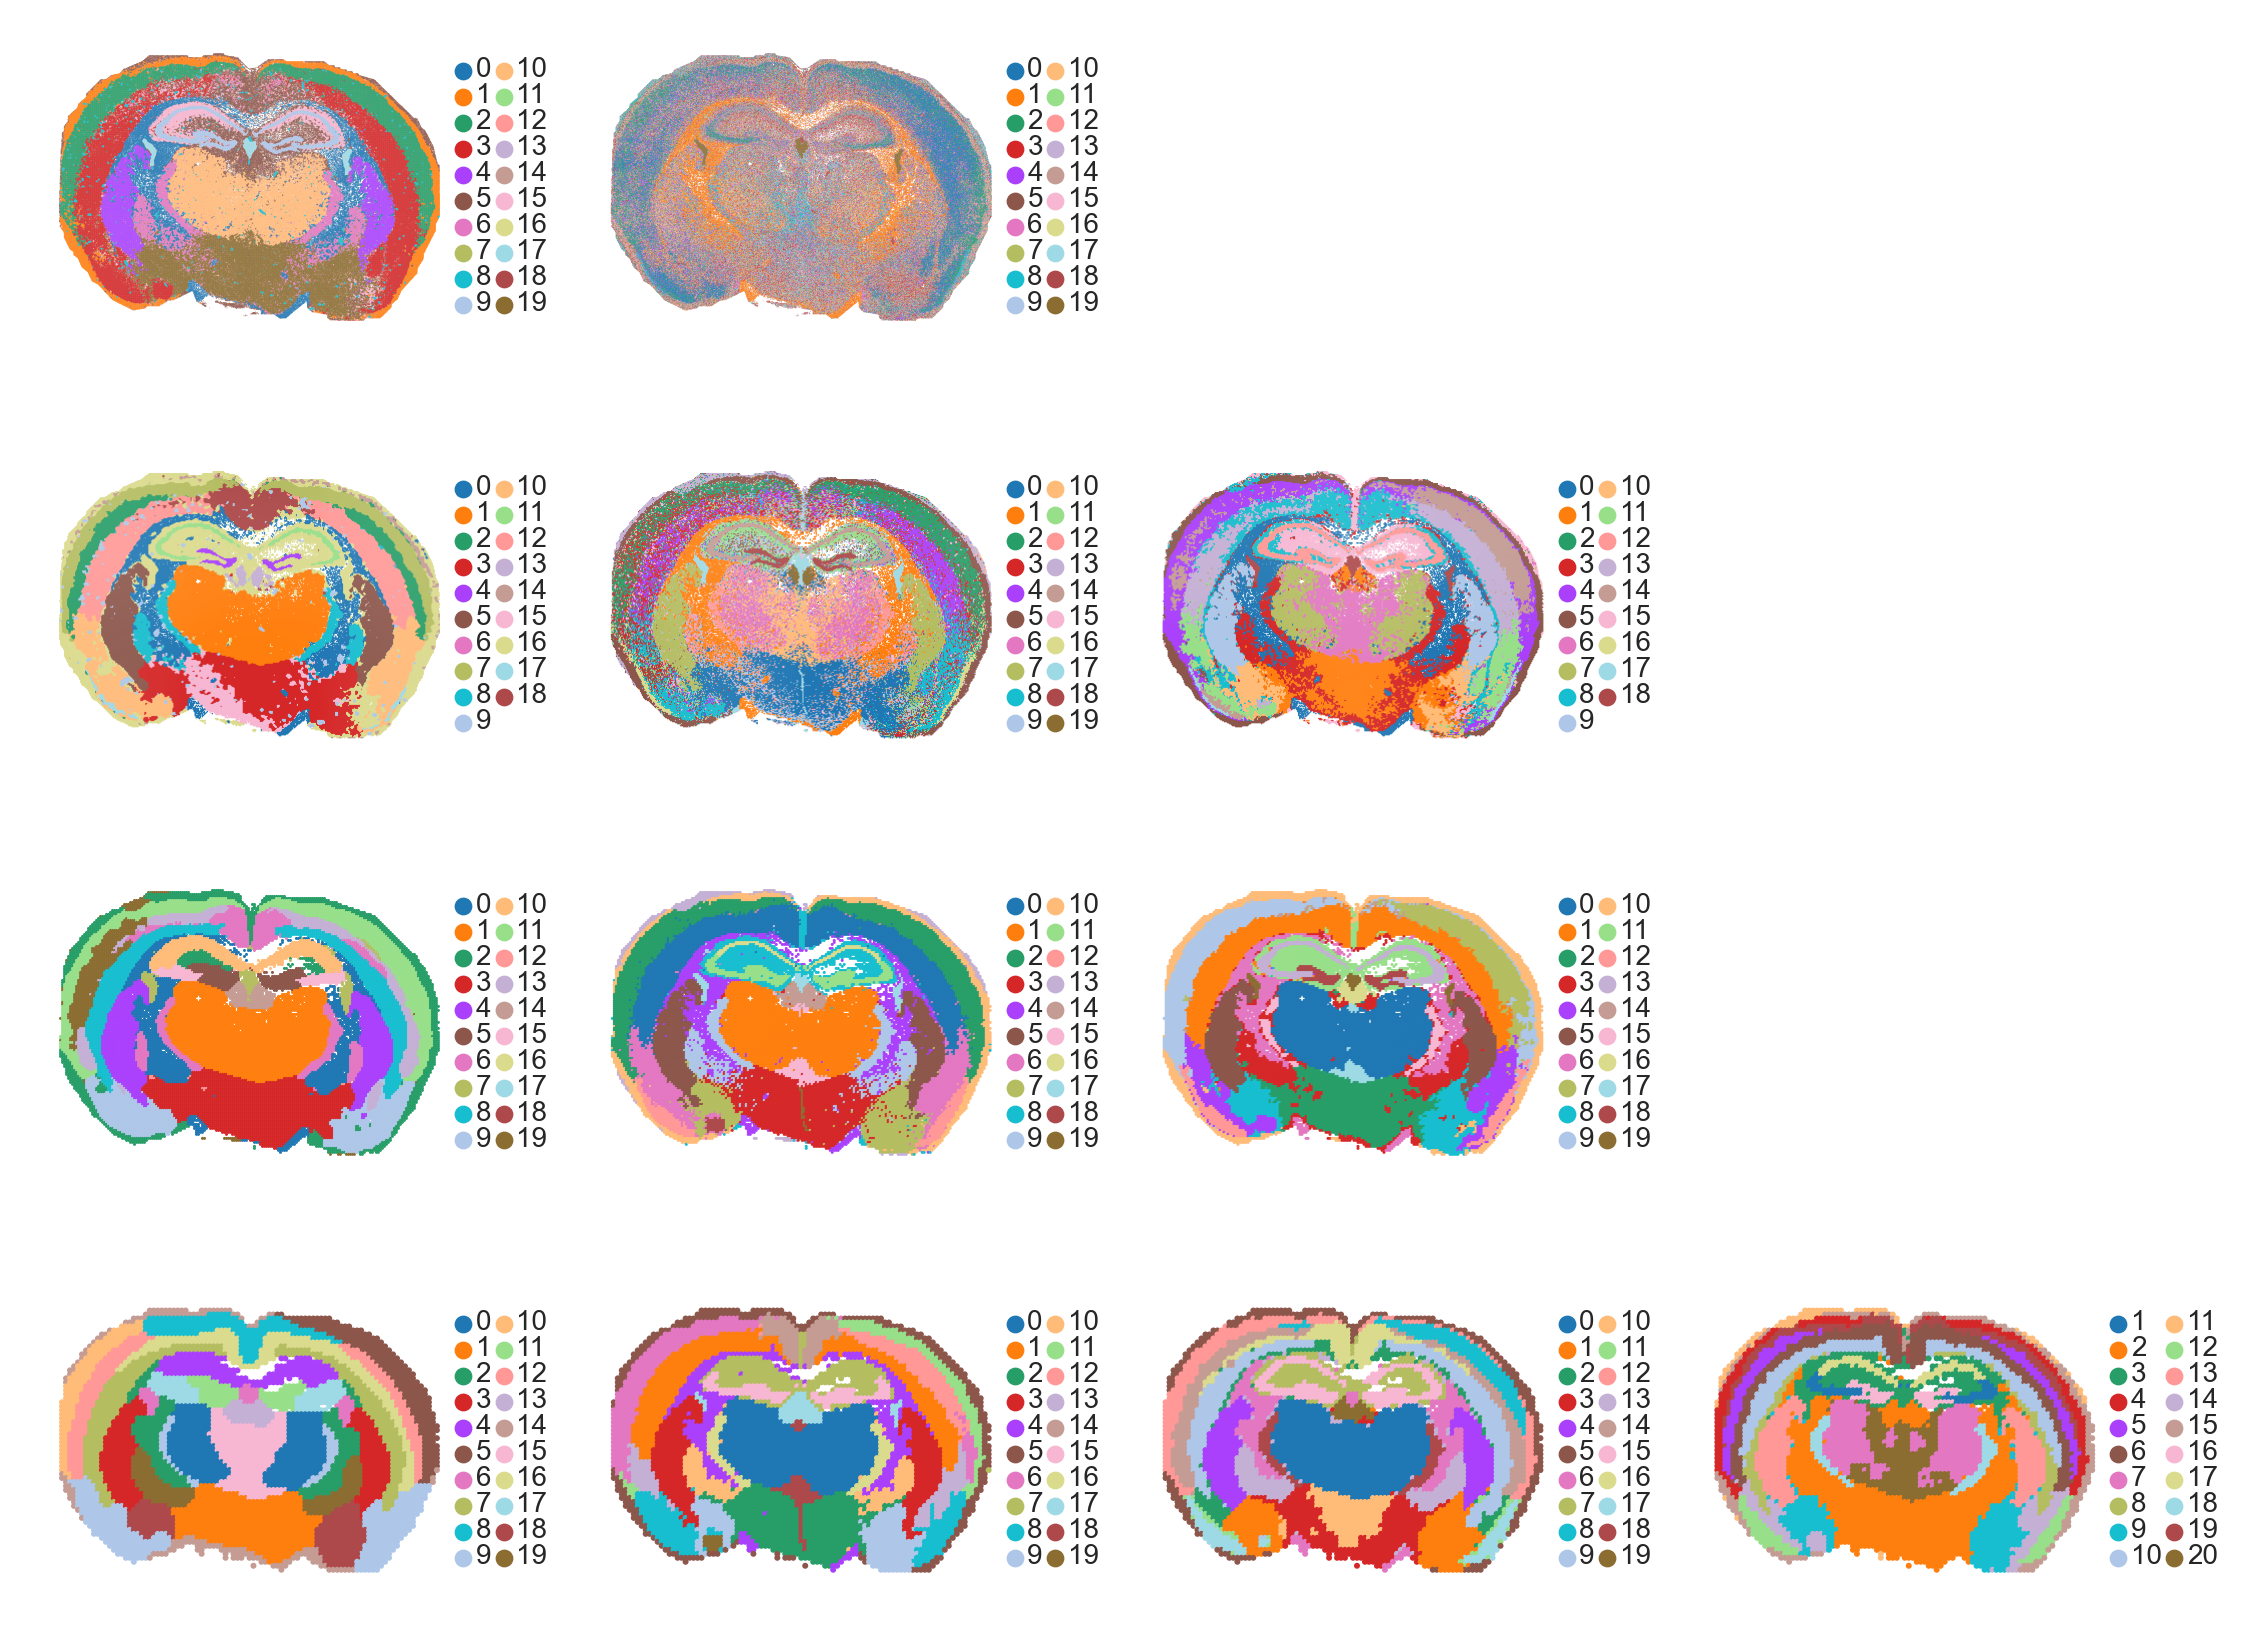

In [24]:
fig=plt.figure(figsize=(18*centimeter, 22*centimeter), dpi=400)
# fig.set_size_inches(5, 1.75)
gs=gridspec.GridSpec(22*2, 18*2)
plt.tight_layout()
# fig,ax = plt.subplots(figsize=(3*centimeter, 3*centimeter), dpi=400, ) #

####################
####################
## mouse brain bin20

ax0 = plt.subplot(gs[0:7, 0:7])
# ax.set_axis_off()
# ax1.set_frame_on(False)
sc.pl.spatial(adata_bin20, color='SpaSEG_clusters', spot_size=1.5, frameon=False,
              ax=ax0, show=False)
# ax0.set_title('SpaSEG cluster', pad=0)
ax0.set_title(None)
ax0.legend(loc='center left', bbox_to_anchor=[1,0.5], ncol=2, frameon=False, fontsize=5)


ax1 = plt.subplot(gs[0:7, 9:16])
# ax.set_axis_off()
# ax1.set_frame_on(False)
sc.pl.spatial(adata_bin20, color='Leiden_clusters', spot_size=1.5, frameon=False,
              ax=ax1, show=False)
ax1.set_title(None)
ax1.legend(loc='center left', bbox_to_anchor=[1,0.5], ncol=2, frameon=False, fontsize=5)



####################
####################
## mouse brain bin50

ax5 = plt.subplot(gs[7:14,0:7])
sc.pl.spatial(adata_bin50, color=["SpaSEG_clusters"], spot_size=1.5, frameon=False, 
              ax=ax5, show=False,
)
ax5.legend(loc='center left', bbox_to_anchor=[1,0.5], ncol=2, frameon=False, fontsize=5)
# ax5.set_title('SpaGCN cluster', pad=0)
ax5.set_title(None)


ax6 = plt.subplot(gs[7:14,9:16])
sc.pl.spatial(adata_bin50, color=["Leiden_clusters"], spot_size=1.5, frameon=False, 
              ax=ax6, show=False,
)
ax6.legend(loc='center left', bbox_to_anchor=[1,0.5], ncol=2, frameon=False, fontsize=5)
# ax6.set_title('SpaSEG cluster', pad=0)
ax6.set_title(None)

ax7 = plt.subplot(gs[7:14,18:25])
sc.pl.spatial(adata_bin50, color=["SpaGCN_clusters"], spot_size=1.5, frameon=False, 
              ax=ax7, show=False,
)
ax7.legend(loc='center left', bbox_to_anchor=[1,0.5], ncol=2, frameon=False, fontsize=5)
ax7.set_title(None)



####################
####################
## mouse brain bin100

ax9 = plt.subplot(gs[14:21,0:7])
sc.pl.spatial(adata_bin100, color=["SpaSEG_clusters"], spot_size=1.5, frameon=False, 
              ax=ax9, show=False,
)
ax9.legend(loc='center left', bbox_to_anchor=[1,0.5], ncol=2, frameon=False, fontsize=5)
ax9.set_title(None)


ax10 = plt.subplot(gs[14:21,9:16])
sc.pl.spatial(adata_bin100, color=["Leiden_clusters"], spot_size=1.5, frameon=False, 
              ax=ax10, show=False,
)
ax10.legend(loc='center left', bbox_to_anchor=[1,0.5], ncol=2, frameon=False, fontsize=5)
ax10.set_title(None)
# ax6.set_title('SpaSEG cluster', pad=0)

ax11 = plt.subplot(gs[14:21,18:25])
sc.pl.spatial(adata_bin100, color=["SpaGCN_clusters"], spot_size=1.5, frameon=False, 
              ax=ax11, show=False,
)
ax11.legend(loc='center left', bbox_to_anchor=[1,0.5], ncol=2, frameon=False, fontsize=5)
ax11.set_title(None)



####################
####################
## mouse brain bin200
ax12 = plt.subplot(gs[21:28,0:7])
sc.pl.spatial(adata_bin200, color=["SpaSEG_clusters"], spot_size=1.5, frameon=False, 
              ax=ax12, show=False,
)
ax12.legend(loc='center left', bbox_to_anchor=[1,0.5], ncol=2, frameon=False, fontsize=5)
ax12.set_title(None)


ax13 = plt.subplot(gs[21:28,9:16])
sc.pl.spatial(adata_bin200, color=["Leiden_clusters"], spot_size=1.5, frameon=False, 
              ax=ax13, show=False,
)
ax13.legend(loc='center left', bbox_to_anchor=[1,0.5], ncol=2, frameon=False, fontsize=5)
ax13.set_title(None)


ax14 = plt.subplot(gs[21:28,18:25])
sc.pl.spatial(adata_bin200, color=["SpaGCN_clusters"], spot_size=1.5, frameon=False, 
              ax=ax14, show=False,
)
ax14.legend(loc='center left', bbox_to_anchor=[1,0.5], ncol=2, frameon=False, fontsize=5)
ax14.set_title(None)



ax15 = plt.subplot(gs[21:28,27:34])
sc.pl.spatial(adata_bin200, color=["BayesSpace_clusters"], spot_size=1.5, frameon=False, 
              ax=ax15, show=False,
)
ax15.legend(loc='center left', bbox_to_anchor=[1,0.5], ncol=2, frameon=False, fontsize=5)
ax15.set_title(None)



plt.draw()
# plt.savefig('fig3/fig3_supplementary.pdf', bbox_inches='tight', format='pdf', dpi=400)